# Kristiyan Dimitrov 
## Python/Java Programming - Homework 1

### Exercise 1 – Procedural vs Functional Programming 

### 1. Create a function that will randomly generate a list of N numbers and words. 
####    Numbers and words count are random and the order is random too.

In [1]:
#I don't see any way of generating random numbers without this
import random

In [2]:
#First we will need several supporting functions.
#Master function will follow after and will be labelled MASTER

In [3]:
#Function to generate a random letter
def rnd_letter():
    choice=random.randint(1,2) #Picking capital or small letter
    if choice==1:
        return chr(random.randint(65,90)) #These correspond to the Unicode values letters A-Z
    else:
        return chr(random.randint(97,121)) #These correspond to the Unicode values for letters a-z 

In [4]:
#Function to generate random 'word' which is b/w 1 and 10 characters, only letters
def rnd_word():
    word=str() #Initialize an empty string
    choice=random.randint(1,10) # Randomly determine the length of the word
    for i in range(choice):
        letter=rnd_letter()
        word=word+letter
    return word        

In [5]:
# MASTER
def rnd_list(N=1):
    """Randomly generates a list of N numbers and words.
    Parameters: N(int) - Length of randomly generated list. Default N=1.
    - The 'words' are strings of a random length b/w 1 and 10
    - The 'words' contain only capital and small letters
    - The numbers are between -10000 and 10000 inclusive 
    Returns: List of length N with numbers & words."""
    
    lst=list() #First we need to initialize a list
    for i in range(N):
        choice=random.randint(1,2) #Choose b/w letter and word
        if choice==1:
            lst.append(rnd_word())
        elif choice==2:
            lst.append(random.randint(-10000,10000))
        lst
    return lst

### 2. Create two functions to calculate the desired output as follows:
####      a. Procedural code by using loops

    

In [6]:
#First we initialize a random list of random length b/w 1 and 10 incl.
rnd_length=random.randint(1,10)
lst=rnd_list(rnd_length)

In [7]:
#Function to count number of words & numbers
def count_num_word(lst):
    words=0
    numbers=0
    for i in range(len(lst)):
        if type(lst[i])==str:
            words+=1
        elif type(lst[i])==int:
            numbers+=1
    return print("Count of Numbers: ",numbers,"\n","Count of words: ",words)

  
#### b. Functional code by using list comprehension.

In [8]:
def count_num_word_2(lst):
     
    words=sum(1 for el in lst if type(el)==str)
    numbers=sum(1 for el in lst if type(el)==int)
    return print("Count of Numbers: ", numbers,"\n","Count of words: ",words)

### 3. Use TimeIt standard library and matplotlib to present the performance difference among the 2 solutions for different list sizes (N=100, 1000, 10000, 100000).

In [9]:
import timeit

In [40]:
# Alternative


#We define a string variable which contains all necessary functions which need to be timed
timesetup='''from __main__ import random, rnd_letter, rnd_word, rnd_list
rnd_length=random.randint(1,10)
lst=rnd_list(rnd_length)'''

#This is the procedural code to be evaluated by timeit
code='''
words=0
numbers=0
for i in range(len(lst)):
    if type(lst[i])==str:
        words+=1
    elif type(lst[i])==int:
        numbers+=1'''
#This is the functional code to be evaluated by timeit
code2='''
words=sum(1 for el in lst if type(el)==str)
numbers=sum(1 for el in lst if type(el)==int)'''

loop_times=list()
loop_times.append(timeit.timeit(setup=timesetup,stmt=code,number=100))
loop_times.append(timeit.timeit(setup=timesetup,stmt=code,number=1000))
loop_times.append(timeit.timeit(setup=timesetup,stmt=code,number=10000))
loop_times.append(timeit.timeit(setup=timesetup,stmt=code,number=100000))
print("Here are the times for the Procedural Code: ",loop_times)

loop_times_2=list()
loop_times_2.append(timeit.timeit(setup=timesetup,stmt=code2,number=100))
loop_times_2.append(timeit.timeit(setup=timesetup,stmt=code2,number=1000))
loop_times_2.append(timeit.timeit(setup=timesetup,stmt=code2,number=10000))
loop_times_2.append(timeit.timeit(setup=timesetup,stmt=code2,number=100000))
print("Here are the times for the Functional Code: ",loop_times_2)

Here are the times for the Procedural Code:  [0.0001486589999331045, 0.0012446860000636661, 0.0146391330000597, 0.12849141399999553]
Here are the times for the Functional Code:  [0.00012661900007060467, 0.0010780279999380582, 0.01667514799999026, 0.1862389869999106]


Populating the interactive namespace from numpy and matplotlib


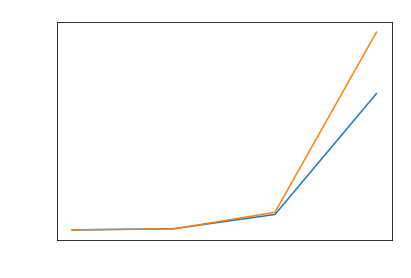

In [44]:
#Let's graph the results
%pylab inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
x_axis=["2","3","4","5"]
fig=plt.figure()
fig.add_axes()
ax=fig.add_subplot(111)
lines=ax.plot(x_axis,loop_times)
lines2=ax.plot(x_axis,loop_times_2)
ax.set(ylabel="Execution time (Seconds)",
      xlabel="10^x degree # of iterations")
title_obj=plt.title("Procedural (Blue) vs Functional (Orange) Performence Time")
plt.setp(title_obj,color="w")
ax.xaxis.label.set_color("w")
ax.tick_params(axis='x', colors='w')
ax.yaxis.label.set_color("w")
ax.tick_params(axis='y', colors='w')

In [45]:
# We see that the functional (orange graph) usually performs better, particularly at a higher number of iterations.
# Note that the graph might look different for you.
# Everytime I rerun the two code chunks above, I get slightly different graphs.

In [485]:
#Source: UNICODE documentation: https://www.unicode.org/charts/PDF/U0000.pdf

### Exercise 2 – Procedural vs Functional Programming 

In [53]:
#PLEASE READ: This code chunk prepares all required modules and functions
#Just run it once, then run the next one to initialize the menu
import statistics as st
import numpy as np 
import matplotlib.pyplot as plt

# - Load the data set from exams.csv file (file is comma delimited).
def load_data ():
    print('''
        OUTPUT - Data as Dictionary
        
        ''')
    global file_name, data
    file_name = 'exams.csv'
    with open(file_name, 'r') as f: #the 'r' option means we are opening with read-only mode
        global data
        data = f.readlines() 
    data = [data[i].replace("\n","") for i in range(len(data))]
    data = [data[i].split(',') for i in range(len(data))]
    data[0].append("Final_Score")
    data[0].append("Grade")
    for i in range(1,len(data)):
        data[i].append(round(int(data[i][2])*.3+int(data[i][3])*.3+int(data[i][4])*.4,2))
    for i in range(1,len(data)):
        if data[i][5] >= 90:
            data[i].append("A")
        elif data[i][5] >= 80:
            data[i].append("B")
        elif data[i][5] >= 20:
            data[i].append("C")
        elif data[i][5] >= 10:
            data[i].append("D")
        else: data[i].append("F")
        #Up until now we have formatted and calculated additional data
        #Below, we convert the data into a dictionary structure
    header=data[0]
    my_class={}
    for row in range(1,len(data)):
        sub_dict=dict()
        for column in range(1,len(header)):
            sub_dict[str(header[column])]=data[row][column]
        my_class[str(data[row][0])]=sub_dict
    return my_class

# - Print a list of student names, final scores, and letter grades sorted by names.
def names():
    print('''
        OUTPUT - Names, Final Scores, Grades Sorted by Names
        
        ''')
    output=list()
    for i in range(1,len(data)):
        sublist=list()
        sublist.append(data[i][1])
        sublist.append(data[i][5])
        sublist.append(data[i][6])
        output.append(sublist)
    output.sort()
    print(data[0][1],data[0][5],data[0][6])
    return output

def score_summary():
    global grades
    grades=list()
    for i in range(1,len(data)):
        grades.append(data[i][6])
    global final_scores
    final_scores=list()
    for i in range(1,len(data)):
        final_scores.append(data[i][5])
    global grades_count
    grades_count=[grades.count(i) for i in np.unique(grades)]
    global grades_unique
    grades_unique=np.unique(grades)
    print('''
        OUTPUT - Score Summary
        
        ''')
    print("Number of students: ",len(data)-1)
    global min_score
    min_score=data[1][5]
    for i in range(2,len(data)):
        if data[i][5]<min_score:
            min_score=data[i][5]
    print("Min Score: ",min_score) 
    global max_score
    max_score=data[1][5]
    for i in range(2,len(data)):
        if data[i][5]>max_score:
            max_score=data[i][5]
    print("Max Score: ",max_score)
    global summation
    summation=data[1][5]
    global mean
    for i in range(2,len(data)):
        summation=summation+data[i][5]
        global mean
        mean=round(summation/(len(data)-1),2)
    print("Mean Score: ",mean)
    mode=st.mode(grades)
    print("Mode Grade: ",mode)
    global sd
    sd=round(st.stdev(final_scores),2)
    print("Final Score Standard Deviation: ",sd)
    
def outliers():
    print('''
        
        OUTPUT - Outliers
        
        ''')
    for i in range(1,len(data)):
        if data[i][5]>mean+sd*2:
            print(data[i][1],data[i][5])
    return

def pie():
    print('''
        OUTPUT - Pie Chart and Grades Distribution
        
        ''')
    plt.pie(grades_count,labels=grades_unique)
    print("Legend:")
    for i in range(len(grades_unique)):
        print("Count of ",grades_unique[i],":",grades_count[i])
    plt.show()
    
def box_plot():
    print('''
        OUTPUT - Box Plot Parameters
        
        ''')
    median=st.median(final_scores)
    q1=np.quantile(final_scores,.25)
    q3=np.quantile(final_scores,.75)
    print("Min Score: ",min_score)
    print("Q1: ",q1)
    print("Median Score: ",median)
    print("Q3: ",q3)
    print("Max Score: ",max_score)

In [54]:
# Initialize Program - Just Run this chunk
while True: #Ask user for input until the user enters EXIT or QUIT
    choice = input('''Enter command name or number
    1) ready data: prepares and presents the data
    2) names: Prints out names
    3) score summary: Gives Min, Max, Mean, Mode and SD of Scores/Grades
    4) outliers: Shows you names and final scores of students more than 2 SD above the mean
    5) pie: Plots a pie chart
    6) box plot: Gives Min, Q1, Median, Q3, Max
    0) exit: Quit this menu
    
    WARNING: Use command #1 to load the data first! 
    Otherwise, error message will be displayed.
    What is your Command:''')
    if choice=="0" or choice.upper() in ('EXIT', 'QUIT'):
        break
        
    if (choice == "ready data" or choice == "1"):
        output=load_data()
        for el in output:
            print(output[el])
        
    if choice == "names" or choice=="2":
        try:
            output=names()
            for el in range(len(output)):
                print(output[el])
        except:
            print("ERROR ENCOUNTERED: Did you load the data? Use function 1")   
    if choice == "score summary" or choice=="3":
        try: 
            score_summary()  
        except:
            print("ERROR ENCOUNTERED: Did you load the data? Use function 1")
    if choice == "outliers" or choice=="4":
        try:
            outliers()
        except:
            print("ERROR ENCOUNTERED: Did you load the data? Use function 1")
    if choice == "pie" or choice=="5":
        try:
            pie()
        except:
            print("ERROR ENCOUNTERED: Did you load the data? Use function 1")
    if choice == "box plot" or choice== "6":
        try:
            box_plot()
        except:
            print("ERROR ENCOUNTERED: Did you load the data? Use function 1")

Enter command name or number
    1) ready data: prepares and presents the data
    2) names: Prints out names
    3) score summary: Gives Min, Max, Mean, Mode and SD of Scores/Grades
    4) outliers: Shows you names and final scores of students more than 2 SD above the mean
    5) pie: Plots a pie chart
    6) box plot: Gives Min, Q1, Median, Q3, Max
    0) exit: Quit this menu
    
    Otherwise, error message will be displayed.
    What is your Command:1

        OUTPUT - Data as Dictionary
        
        


FileNotFoundError: [Errno 2] No such file or directory: 'exams.csv'

### Exercise 3 – NumPy.Random - Extension library from PyPI 

Pick an extension library from PyPI or other sources (something of interest to you). Summarize the functionality provided by the library (one paragraph) and show a usage example.
Document step-by-step how to run the example provided.


In [ ]:
#I decided to find out how to generate random numbers from a known distribution
#I Googled and found out that I can do this with the numpy.random package.
#I installed numpy on my computer via the Anaconda GUI. 
#You could also do this in Terminal (on Mac): conda install numpy

In [9]:
#First we load the module
import numpy.random as npr

In [ ]:
#The most common numbers we deal with in statistics are normally distributed.
#So, I will look at generating random numbers from a normal distribution
#You can see the help file for the relevant function:
?npr.normal

In [12]:
#Let's generate some random numbers from the standard normal distribution:
numbers=npr.normal(0,1,100)
numbers

array([-0.27617903,  1.18397694, -1.65886486, -1.02754947,  0.30967805,
       -1.20369571, -0.99631545,  0.70454362, -0.32035851,  0.21994026,
        0.33650139,  0.95385073, -0.88928913,  0.97536704, -0.55322455,
        2.18101812,  0.5038848 , -1.79974575, -0.24715079, -1.18075031,
       -0.10524015,  1.32815063, -1.04258263, -0.39253218, -0.05853363,
       -1.02863242,  0.28244072, -1.11452675,  1.26796674,  0.01002691,
       -0.65696269,  1.68078623, -0.52317095,  1.2327562 ,  0.10288496,
       -0.76280742,  1.23760699,  0.43139857, -0.90847537,  1.57697971,
       -0.31037904, -0.1396167 , -1.94588758, -0.06337632,  0.04933427,
        0.1291843 , -0.34875757,  0.56022667,  0.09625509,  0.64495616,
        1.64615258, -0.91562551, -0.79683625, -0.02568918, -1.04054793,
        0.68783943,  0.01542903,  0.23818424,  1.85257586,  0.58264065,
       -1.59271947,  0.26305547, -2.12062059, -0.69342239, -0.89310519,
        0.34755116,  0.07342412,  0.11677087, -0.0426939 , -0.46

In [44]:
#The below two commands give us an idea that the random values we generated are indeed centered around the mean 0
print(list(np.histogram(numbers)[0])) #The count of values
print(list(np.histogram(numbers)[1])) #The buckets dividing the values

[7, 3, 16, 13, 19, 22, 7, 7, 4, 2]
[-2.120620587805528, -1.656474318806471, -1.192328049807414, -0.7281817808083568, -0.26403551180929985, 0.20011075718975713, 0.6642570261888143, 1.128403295187871, 1.5925495641869283, 2.056695833185985, 2.520842102185042]


In [52]:
#Here are some additional distributions we often work with:
# T-Distribution
print(npr.standard_t(2,100)) #The first argument is the degrees of freedom, the second is the number of numbers to be generated

[ 0.19500779 -0.20155798 -6.07682923  3.56327778  0.15458044 -2.01142213
  0.51301697  0.44153392 -1.77487377  1.15951375 -2.44751784 -0.4586231
  0.37055384  0.29279088  1.50609532 -2.45434311 -1.68988011 -1.36811922
 -0.98148024  0.26625079 -0.3549386   0.34836547  0.66597906  0.03647389
 -1.07654089 -0.03082316  1.09899256 -0.49402595  2.10370155 -3.15111113
  0.45688927 -0.44407943 -0.25164658  0.39960665  0.77701911 -0.71061923
 -0.73792593 -0.23039353  0.198502   -1.02802276  0.5113658   0.35483431
 -1.75056447  0.43821559 -1.62631406 -0.03895764 -0.7504885  -0.2049342
 -1.9430076   0.15717347 -5.66064267  3.8940863  -0.56910599 -0.56076092
 -0.74825505 -0.85945117 -0.21386957  0.09934985 -0.13621525 -1.13173077
  0.21963105 -0.67928063  1.51399522  1.04268006 -2.47323457 -0.9756835
 -0.22382772 -3.60119009 -0.28162189  0.1720566  -0.6604823   2.00608224
 -1.13873708 -8.42875283 -3.42688177  3.44128079  0.01851301  1.793635
  0.17309654  0.83257379 -0.72986326  5.11024821  2.3393

In [51]:
# Chi-Square Distribution
print(npr.chisquare(2,100)) #The first argument is the degrees of freedom, the second is the number of numbers to be generated

[2.65334459 0.20007039 5.93700352 2.22316457 3.68753537 0.48995395
 1.5840014  2.72103198 1.65253377 1.37279639 2.44943376 2.25930699
 0.30649797 0.21377674 0.05432013 1.65659728 2.2082203  4.17917997
 3.21820303 0.44678295 0.62015164 1.43591288 0.108876   3.34137116
 3.36585101 1.93541791 5.93536332 0.90704431 0.40796508 0.81341087
 0.09741978 1.39925772 0.92969888 2.19953753 0.13249575 0.16428787
 0.91817274 0.67880238 0.14521017 5.45032015 2.15703616 1.84361159
 5.05988183 0.31699529 0.67201381 0.35198826 2.41000933 1.65302911
 5.44721887 5.16060709 2.83915989 0.528933   2.52952938 0.29451412
 0.07140331 2.04159742 2.00110454 0.09486848 3.58098719 4.29652129
 1.03302792 0.69761324 1.43347236 4.59387164 0.60069926 1.04816338
 3.35000692 0.49378812 2.14354177 4.05440628 2.66944965 1.45078644
 3.35825014 1.16786199 4.61898944 7.54277995 1.01313656 0.55363761
 0.9070301  0.49294303 0.14433386 2.41065134 2.9841887  3.05051885
 8.07237316 0.14456034 6.3169764  0.72381425 4.70443136 0.0127

In [50]:
# F-Distribution
print(npr.f(2,2,100)) #arguments are (in order): df for numerator, df for denominator, number of numbers to be generated

[7.13627362e-01 6.43892454e+00 2.86113130e-01 1.54333302e+00
 1.39263436e-01 1.98794701e+00 3.06533875e-01 5.54740660e-01
 1.51463836e+01 7.11392929e+00 3.70759063e+00 2.50574507e-01
 1.74098450e+00 3.24468524e-02 3.13581977e-02 1.41480591e+01
 1.91885458e+00 7.52292894e+00 3.65521879e-02 2.43892341e+01
 5.68119085e-01 2.39889929e-01 2.32420883e+00 1.05810049e-01
 6.08767249e+00 7.80548449e-01 1.69797724e+00 3.55168887e+00
 1.04380423e-01 1.20203284e-01 1.03443751e+00 8.84870427e-01
 9.74671948e-03 3.19023710e+00 4.77547297e+00 4.27954136e+00
 8.75432881e-01 1.38445212e-01 9.06276384e-02 3.85175855e-02
 3.43858380e-01 6.97549225e-02 7.05184247e-01 1.15930355e+01
 4.98896815e+00 1.54108769e+00 1.19548132e+00 1.34183451e-01
 1.01419752e+00 3.77617201e-01 6.73476645e+00 2.43378701e-01
 4.69769828e-01 2.44047523e+00 5.47707758e+00 4.92709886e-02
 9.48070405e-01 1.86521059e+00 1.55878318e+00 1.38100709e-02
 2.28385249e-01 1.38225857e+00 2.07237613e+01 4.32494863e-01
 1.99974102e+01 1.749989